# Distribution of American AP Grades

Hello Mr Soh, this is rather unconventional, we know. But we felt like, with some of us having been taught Physics in Review by you, this would be a fun way for you to **show** how poorly Americans perform at the APs. Also, since 96% of the exams or smth are taken by Americans anyways, we decided to just stick with the given data.

## Set-Up and Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [14]:
df = pd.read_html(requests.get("https://www.totalregistration.net/AP-Exam-Registration-Service/AP-Exam-Score-Distributions.php").content)[1].drop(columns="Date Tweeted").drop(columns="Trevor's Comments").set_index("Exam").applymap(lambda i: float(i[:-1])/100)
df

,5,4,3,2,1
Exam,,,,,
2-D Art and Design,0.109,0.355,0.403,0.128,0.005
3-D Art and Design,0.065,0.286,0.385,0.238,0.026
AP Research,0.126,0.258,0.442,0.134,0.040
AP Seminar,0.123,0.206,0.554,0.108,0.009
Art History,0.141,0.205,0.267,0.271,0.116
Biology,0.148,0.231,0.299,0.217,0.105
Calculus AB,0.202,0.161,0.191,0.227,0.220
Calculus BC,0.409,0.155,0.205,0.166,0.065
Chemistry,0.114,0.165,0.248,0.242,0.231


## Subjects that Matter

First, let's start by considering only those subjects our school lets up take, which are:
- Biology
- Calculus AB
- Calculus BC
- Chemistry
- Physics 1 - Algebra Based
- Physics C E&M
- Physics C Mech.
- Statistics

In [18]:
nush = df.loc[["Biology", "Calculus AB", "Calculus BC", "Chemistry", "Physics 1 - Algebra Based", "Physics C E&M", "Physics C Mech.", "Statistics"]]
nush

,5,4,3,2,1
Exam,,,,,
Biology,0.148,0.231,0.299,0.217,0.105
Calculus AB,0.202,0.161,0.191,0.227,0.220
Calculus BC,0.409,0.155,0.205,0.166,0.065
Chemistry,0.114,0.165,0.248,0.242,0.231
Physics 1 - Algebra Based,0.074,0.168,0.181,0.275,0.302
Physics C E&M,0.300,0.245,0.143,0.183,0.129
Physics C Mech.,0.253,0.268,0.215,0.158,0.106
Statistics,0.143,0.221,0.235,0.167,0.234


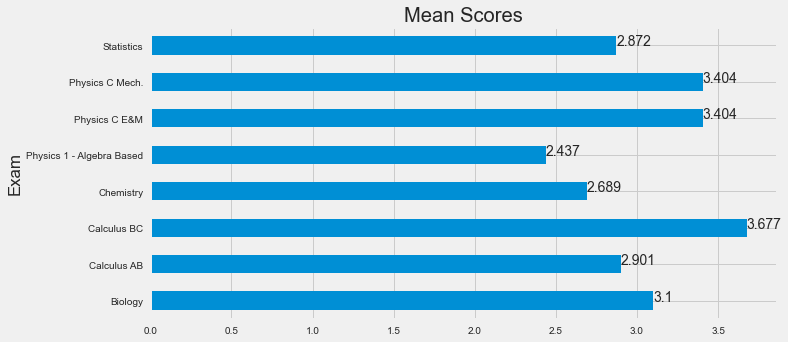

In [92]:
means = nush.iloc[:, ::-1].apply(axis = 1, func = lambda row: sum(map(lambda t: int(t[0])*t[1], dict(row).items())))
means.plot.barh(figsize=(10, 5), title="Mean Scores", ylim=(0, 5))
for i, val in enumerate(means.tolist()):
    plt.text(val, i, f"{round(val, 3)}")


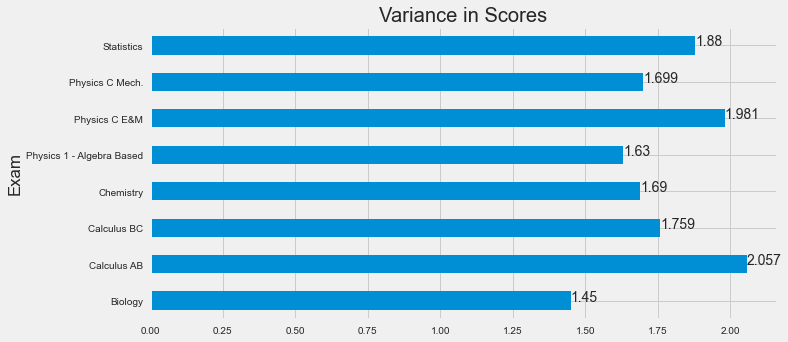

In [93]:
ex2 = nush.iloc[:, ::-1].apply(axis = 1, func = lambda row: sum(map(lambda t: int(t[0])**2 *t[1], dict(row).items())))
variances = ex2 - (means ** 2)
variances.plot.barh(figsize=(10, 5), title="Variance in Scores")
for i, val in enumerate(variances.tolist()):
    plt.text(val, i, f"{round(val, 3)}")


## AP Physics 1

Text(0.5, 1.0, 'Locations of the Separations for Each of the Score Tiers :)')

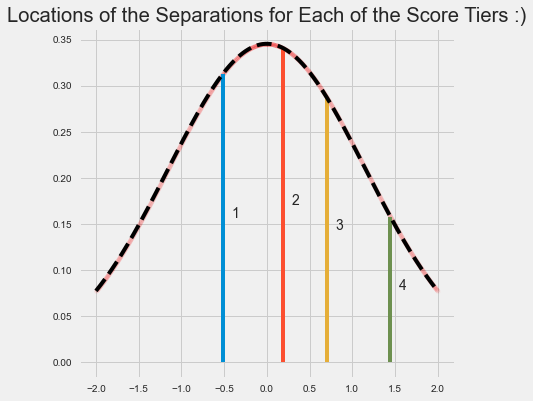

In [90]:
def pdf(x,mean,std):
    return 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))

from scipy.stats import norm
x = np.linspace(-2, 2, 10000)
mean = np.mean(x)
std = np.std(x)
y = pdf(x,mean,std)

plt.style.use('fivethirtyeight')
plt.figure(figsize = (6, 6))
for idx, i in enumerate(nush.iloc[4, ::-1].cumsum()[:4].apply(norm.ppf)):
    y_current = pdf(i, mean, std)
    liney = np.linspace(0, y_current, 1000)
    plt.plot(np.full_like(liney, i), liney)
    plt.text(i+0.1, y_current/2, f"{idx+1}")

plt.plot(x, y, color = 'black', linestyle = 'dashed')
plt.scatter( x, y, marker = 'o', s = 25, color = 'red', alpha=0.005)
plt.title("Locations of the Separations for Each of the Score Tiers :)")